<a href="https://colab.research.google.com/github/AshuPraja13/Data-Science/blob/main/Mall_Customer_Segmentation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stratification of customer of a Mall using information provided by the Mall.

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
67,68,Female,68,48,48
191,192,Female,32,103,69
173,174,Male,36,87,92
155,156,Female,27,78,89
102,103,Male,67,62,59


**Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
data = df.copy()
df = df.drop(columns=['CustomerID','Gender'])

In [8]:
# df['Gender'] = df['Gender'].map({'Male':1,"Female":0})

In [9]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


**EDA**

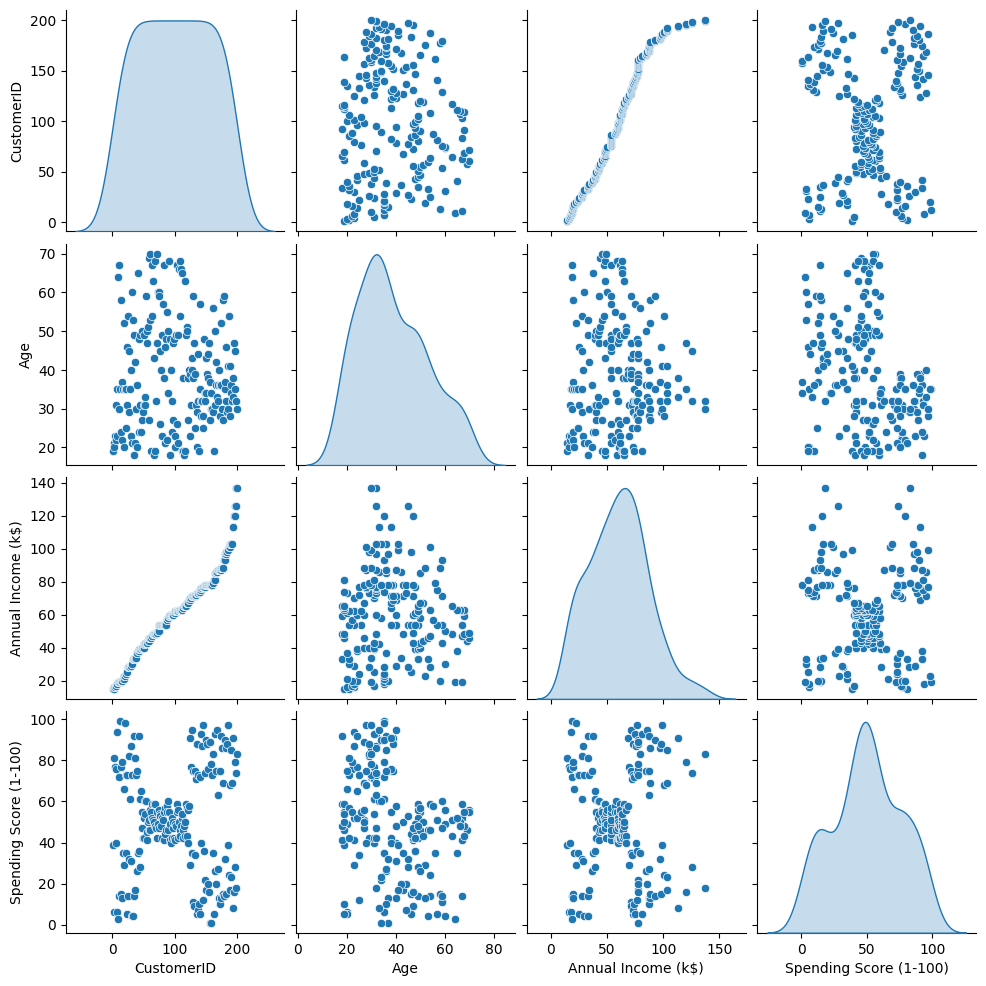

In [10]:
sns.pairplot(data,diag_kind='kde')

<Axes: >

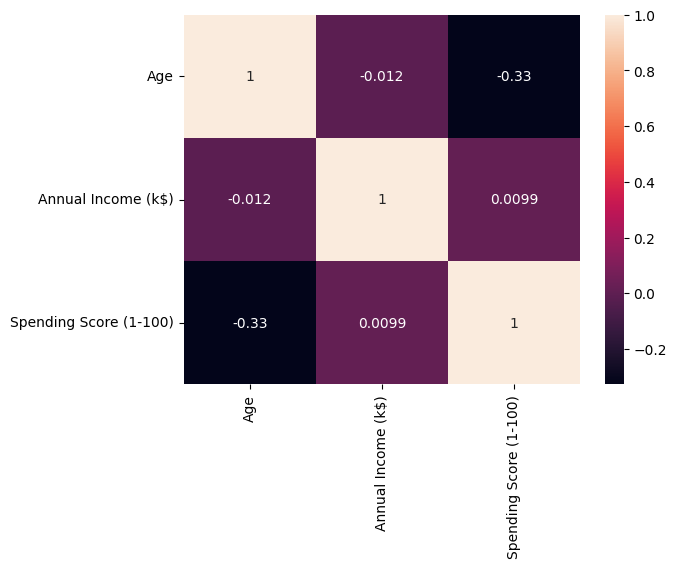

In [11]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

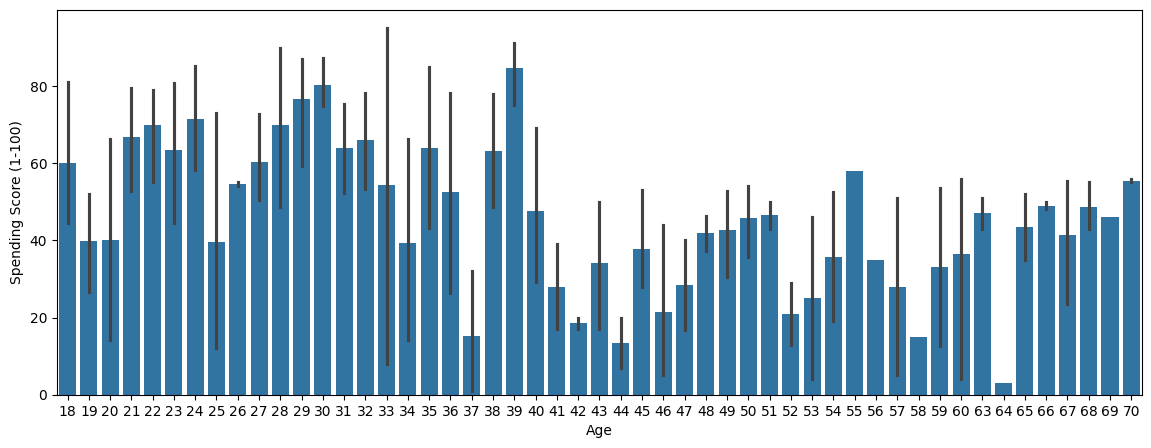

In [12]:
plt.figure(figsize=(14,5))
sns.barplot(x = data['Age'],y=data['Spending Score (1-100)'])

**Feature Engineering**

In [13]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [14]:
df = mm.fit_transform(df)

**Creating a model**

**KMeans**

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
outliers = []
sil_score = []
for i in range(3,12):
  kmeans = KMeans(n_clusters=i-1,n_init='auto',random_state=0)
  pred = kmeans.fit(df)
  out = pred.inertia_
  s_score = silhouette_score(df,pred.labels_)
  sil_score.append(s_score)
  outliers.append(out)

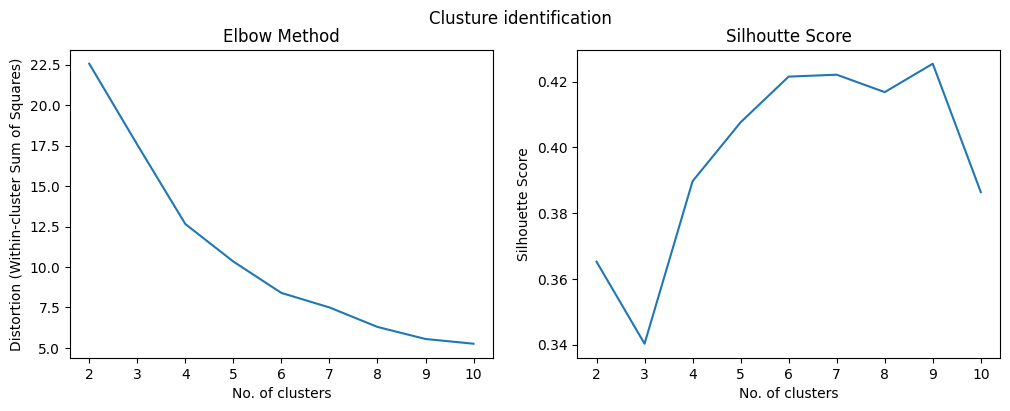

In [17]:
plt.figure(figsize= (12,4))
plt.suptitle('Clusture identification')
plt.subplot(1,2,1)
sns.lineplot(x = range(2,11),y=outliers)
plt.title("Elbow Method")
plt.xlabel('No. of clusters')
plt.ylabel('Distortion (Within-cluster Sum of Squares)')
plt.subplot(1,2,2)
sns.lineplot(x = range(2,11),y=sil_score)
plt.title("Silhoutte Score")
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=6,n_init='auto')
pred = kmeans.fit(df)
pred.inertia_

9.114043723125128

In [19]:
silhouette_score(df,pred.labels_)

0.3987044328861582

**DBSCAN**

In [20]:
from sklearn.cluster import DBSCAN

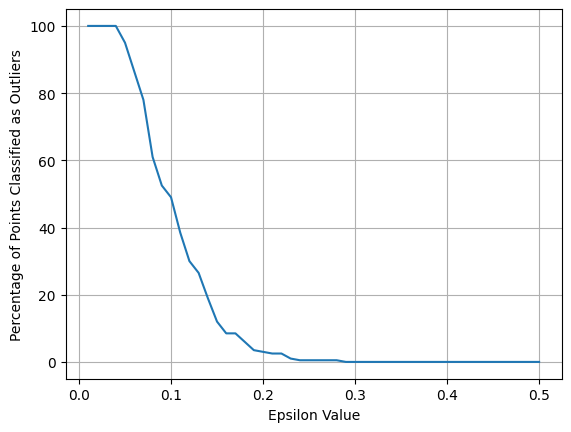

In [21]:
outlier_per = []

for i in np.linspace(0.01,0.5,50):
  dbscan = DBSCAN(eps=i)
  dbscan.fit(df)
  per_outlier = np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)*100
  outlier_per.append(per_outlier)

sns.lineplot(x=np.linspace(.01,0.5,50),y=outlier_per)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.grid(True)
plt.show()

In [22]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit_predict(df)
np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)*100

3.0

In [23]:
dbscan.labels_

array([-1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0])

In [24]:
data['KMeans'] = pred.labels_
# data['DBSCAN'] = dbscan.labels_

In [25]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


**Data Visualization**

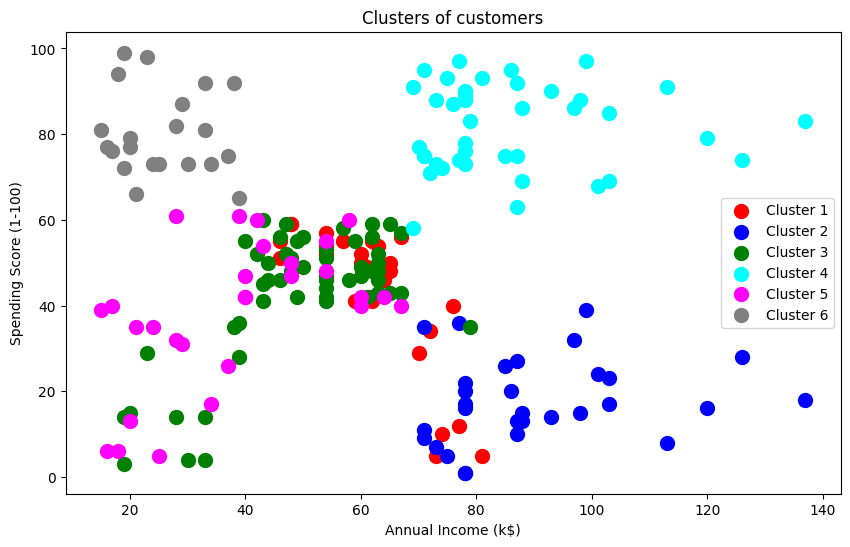

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(data[data['KMeans']== 0].iloc[:,3], data[data['KMeans']== 0].iloc[:,4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[data['KMeans']== 1].iloc[:,3], data[data['KMeans']== 1].iloc[:,4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[data['KMeans']== 2].iloc[:,3], data[data['KMeans']== 2].iloc[:,4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[data['KMeans']== 3].iloc[:,3], data[data['KMeans']== 3].iloc[:,4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[data['KMeans']== 4].iloc[:,3], data[data['KMeans']== 4].iloc[:,4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data[data['KMeans']== 5].iloc[:,3], data[data['KMeans']== 5].iloc[:,4], s = 100, c = 'grey', label = 'Cluster 6')
# plt.scatter(pred.cluster_centers_[:, 0], pred.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

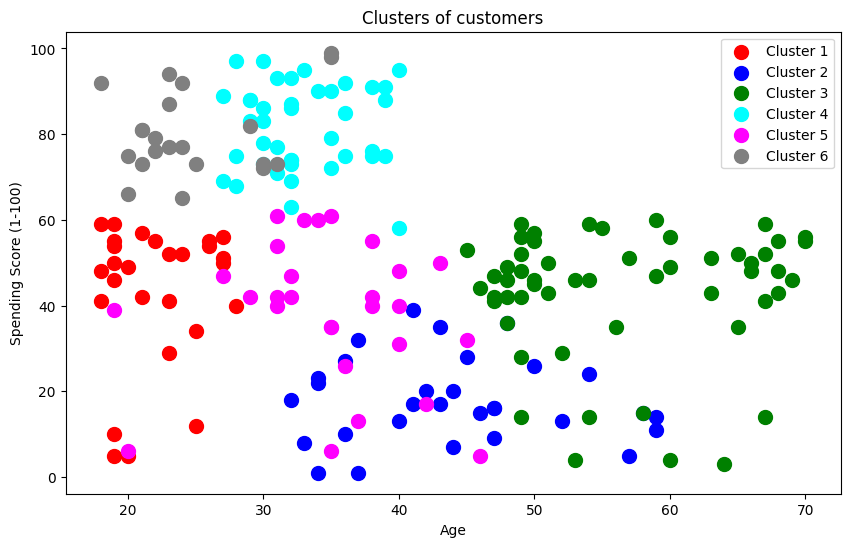

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(data[data['KMeans']== 0].iloc[:,2], data[data['KMeans']== 0].iloc[:,4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[data['KMeans']== 1].iloc[:,2], data[data['KMeans']== 1].iloc[:,4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[data['KMeans']== 2].iloc[:,2], data[data['KMeans']== 2].iloc[:,4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[data['KMeans']== 3].iloc[:,2], data[data['KMeans']== 3].iloc[:,4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[data['KMeans']== 4].iloc[:,2], data[data['KMeans']== 4].iloc[:,4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data[data['KMeans']== 5].iloc[:,2], data[data['KMeans']== 5].iloc[:,4], s = 100, c = 'grey', label = 'Cluster 6')
# plt.scatter(pred.cluster_centers_[:, 0], pred.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

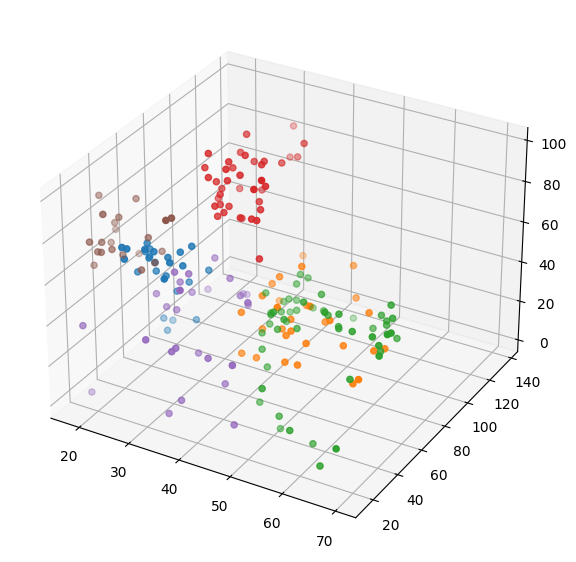

In [28]:
fig = plt.figure(figsize=(7,10))
ax = plt.axes(projection='3d')
# z = np.linspace(0, 1, 100)
# x = z * np.sin(25 * z)
# y = z * np.cos(25 * z)
ax.scatter3D(data[data['KMeans']== 0].iloc[:,2], data[data['KMeans']== 0].iloc[:,3], data[data['KMeans']== 0].iloc[:,4], 'red', label = 'Cluster 1')
ax.scatter3D(data[data['KMeans']== 1].iloc[:,2], data[data['KMeans']== 1].iloc[:,3], data[data['KMeans']== 1].iloc[:,4], 'blue', label = 'Cluster 2')
ax.scatter3D(data[data['KMeans']== 2].iloc[:,2], data[data['KMeans']== 2].iloc[:,3], data[data['KMeans']== 2].iloc[:,4], 'green', label = 'Cluster 3')
ax.scatter3D(data[data['KMeans']== 3].iloc[:,2], data[data['KMeans']== 3].iloc[:,3], data[data['KMeans']== 3].iloc[:,4], 'cyan', label = 'Cluster 4')
ax.scatter3D(data[data['KMeans']== 4].iloc[:,2], data[data['KMeans']== 4].iloc[:,3], data[data['KMeans']== 4].iloc[:,4], 'magenta', label = 'Cluster 5')
ax.scatter3D(data[data['KMeans']== 5].iloc[:,2], data[data['KMeans']== 5].iloc[:,3], data[data['KMeans']== 5].iloc[:,4], 'grey', label = 'Cluster 6')

In [29]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


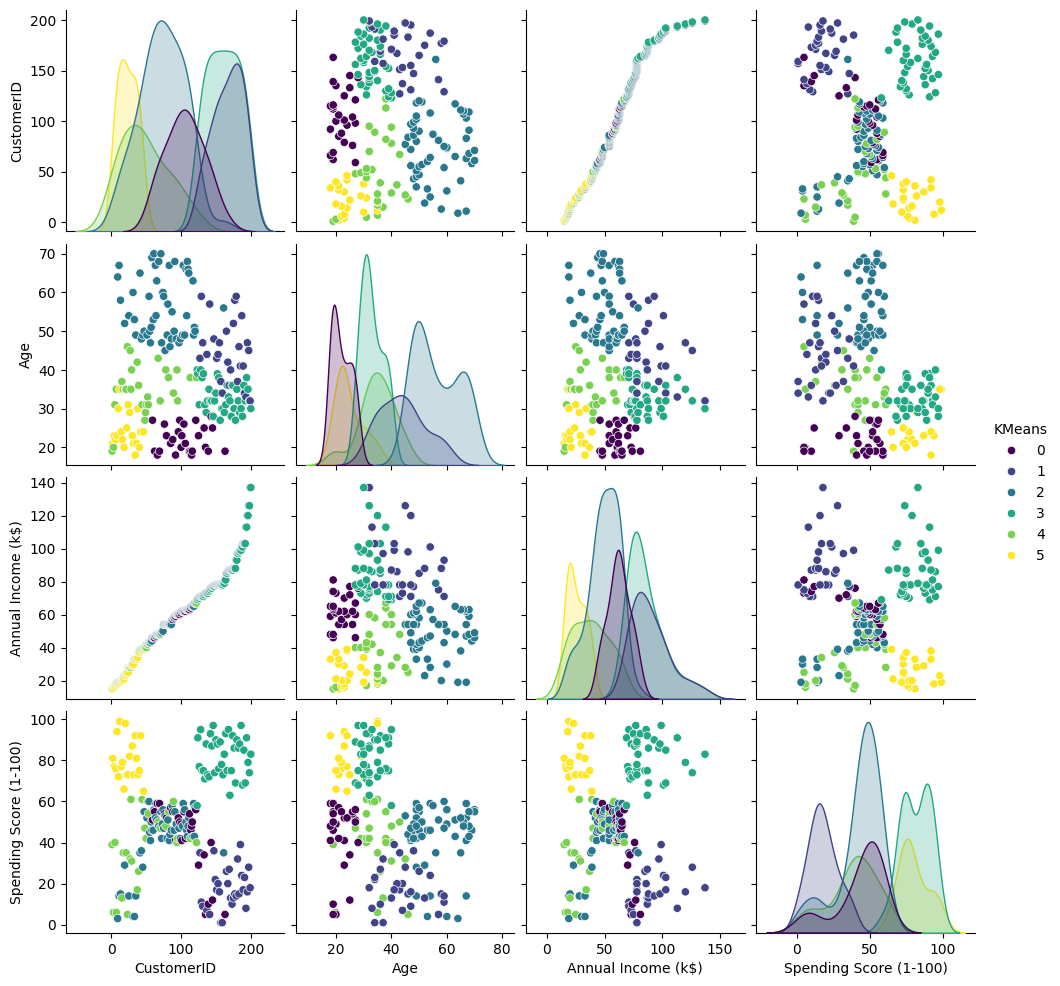

In [30]:
sns.pairplot(data, hue='KMeans', palette='viridis')

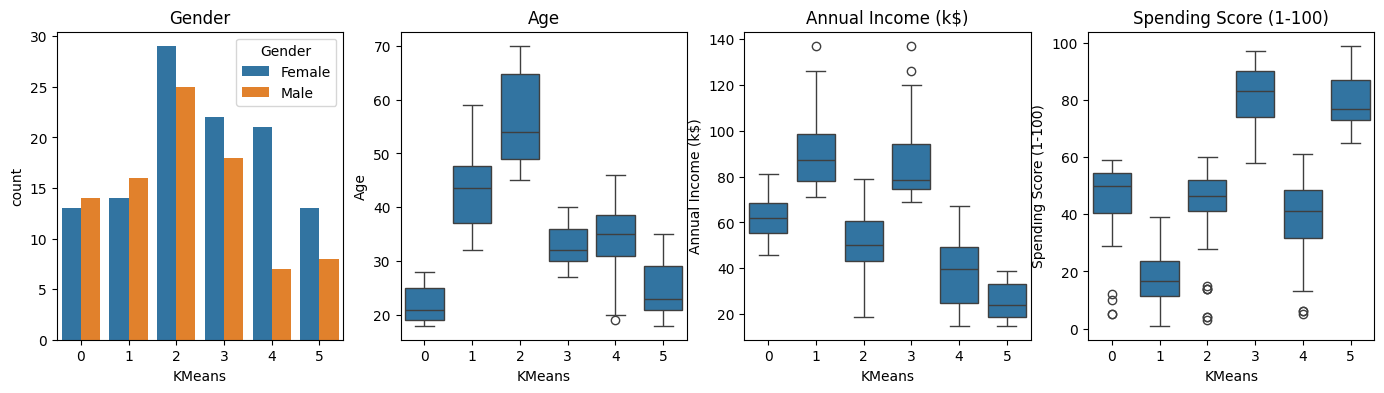

In [31]:
plt.figure(figsize = (17,4))
plt.subplot(1,4,1)
sns.countplot(data=data, x='KMeans',hue='Gender')
plt.title('Gender')
plt.subplot(1,4,2)
sns.boxplot(data=data, x='KMeans', y='Age')
plt.title('Age')
plt.subplot(1,4,3)
sns.boxplot(data=data, x='KMeans', y='Annual Income (k$)')
plt.title('Annual Income (k$)')
plt.subplot(1,4,4)
sns.boxplot(data=data, x='KMeans', y='Spending Score (1-100)')
plt.title('Spending Score (1-100)')
plt.show()